In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
df=pd.read_csv("C:\\Users\\dell\\Downloads\\sales_data_sample.csv", encoding="windows-1252")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [9]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [12]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [18]:
df.drop("ADDRESSLINE2",axis=1,inplace=True)

In [22]:
# Total revenue by product
product_sales=df.groupby("PRODUCTLINE")["SALES"].sum().sort_values(ascending=False)
product_sales

PRODUCTLINE
Classic Cars        3919615.66
Vintage Cars        1903150.84
Motorcycles         1166388.34
Trucks and Buses    1127789.84
Planes               975003.57
Ships                714437.13
Trains               226243.47
Name: SALES, dtype: float64

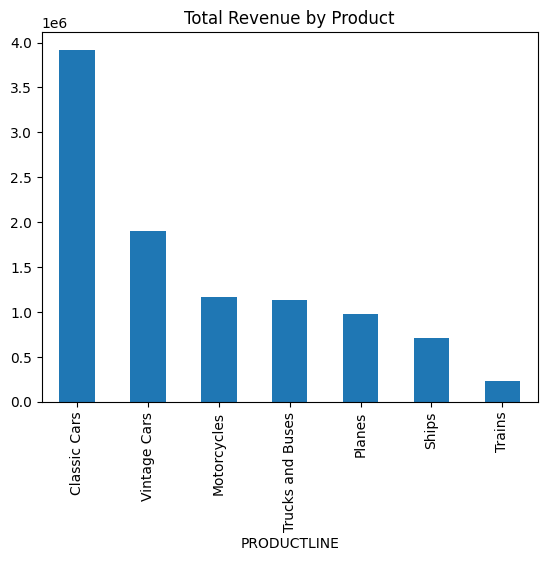

In [23]:
product_sales.plot(kind="bar",title="Total Revenue by Product")
plt.show()

In [29]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
0,10107,30,95.70,2,2871.00,1,2,2003,95
1,10121,34,81.35,5,2765.90,2,5,2003,95
2,10134,41,94.74,2,3884.34,3,7,2003,95
3,10145,45,83.26,6,3746.70,3,8,2003,95
4,10159,49,100.00,14,5205.27,4,10,2003,95


In [36]:

df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE']).dt.month_name()


In [39]:
# which month generates highest sales
monthly_sales=df.groupby("ORDERDATE")["SALES"].sum().sort_values(ascending=False)
monthly_sales

ORDERDATE
November     2118885.67
October      1121215.22
May           923972.56
February      810441.90
January       785874.44
March         754501.39
April         669390.96
August        659310.57
December      634679.12
September     584724.27
July          514875.97
June          454756.78
Name: SALES, dtype: float64

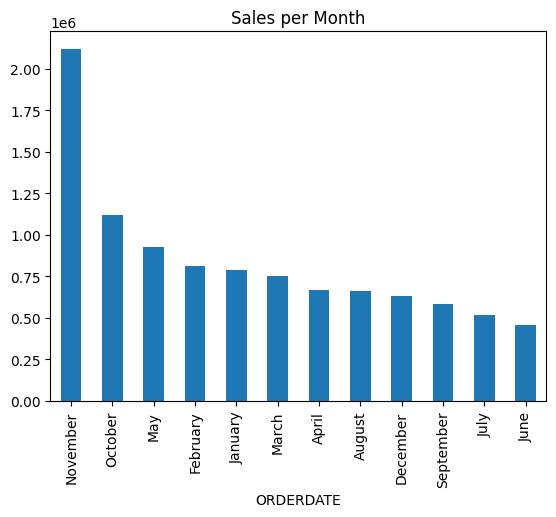

In [41]:
monthly_sales.plot(kind='bar',title="Sales per Month")
plt.show()


In [ ]:
# sales by state
sales_city=df.groupby("CITY")["SALES"].sum().sort_values(ascending=False).nlargest(6)
sales_city

CITY
Madrid           1082551.44
San Rafael        654858.06
NYC               560787.77
Singapore         288488.41
Paris             268944.68
San Francisco     224358.68
Name: SALES, dtype: float64

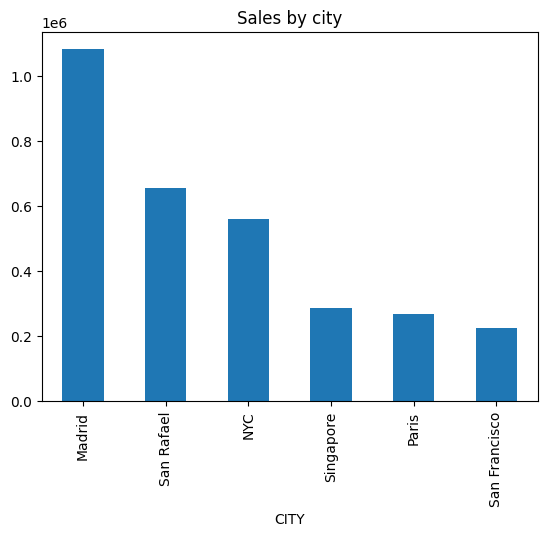

In [46]:
sales_city.plot(kind="bar",title="Sales by city")
plt.show()